<a target="_blank" href="https://colab.research.google.com/github/Detroxsys/RP-2023-2/blob/main/Laboratorios/Lab02%20Modelos%20Lineales/Lab_02_Modelos_Lineales_para_Clasificaci%C3%B3n.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Laboratorio 02: Modelos Lineales para clasificación

El dataset [Fashion-MNIST](https://www.openml.org/d/40996) contiene 70.000 imágenes de productos de moda, clasificados en 10 tipos de ropa, cada uno representado por 28 por 28 valores de píxeles. Veamos qué tan bien podemos clasificarlos con modelos lineales. Comencemos mirando nuestros datos:

In [ ]:
!pip install openml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 KB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11732 sha256=3f70c0ffe767dcc7761ca8c1edd13672ae54bfa420b8bcf6f2bb510e0024921e
  Stored in directory: /root/.cache/pip/wheels/a2/de/68/bf3972de3ecb31e32bef59a7f4c75f0687a3674c476b347c14
Successfully built liac-arff


In [1]:
# Librerías
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm

# Esconder advertencias
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
# Descargamos FMINST data. La primera vez toma algo de tiempo.
fmnist = oml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute); 
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

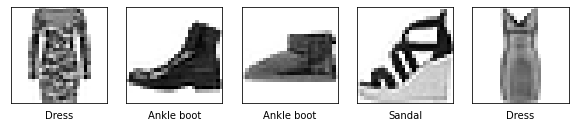

In [3]:
# Tomamos algunos ejemplos aleatorios, hacemos reshape a 32x32
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X.values[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[int(y.values[n])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show();

## Ejercicio 1: un punto de referencia rápido
Primero intentaremos con modelos default [Regresión Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) y [SVMs Lineales](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=linearsvc#sklearn.svm.LinearSVC). Haga clic en los enlaces para leer la documentación. 
Para ver si nuestros modelos se sobreajustan, también evaluamos el error del conjunto de entrenamiento. 
Esto se puede hacer usando [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) 
en lugar de  [`cross_val_scores`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score).

Por ahora, solo estamos interesados ​​en una aproximación rápida, por lo que no usamos el conjunto de datos completo para nuestros experimentos. En cambio, usamos el 10% de nuestras muestras:

In [4]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Tomar una submuestra del 10% estratificada para facilitar la experimentación
Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.1)


Con esta pequeña muestra de nuestros datos, ahora podemos entrenar y evaluar los dos clasificadores.

### Ejercicio 1.1
Implemente la función a continuación que evalúe cada clasificador al que se le pasó los datos anteriores, y luego devuelva los puntajes del train y test de cada uno como una lista. Puede importar funciones adicionales desde cualquier módulo que desee, pero debería poder completar la función con [`cross_validate`] y las funciones integradas estándar de Python. Debajo de la función encontrará una salida de ejemplo.

In [14]:
def evaluate_learners(classifiers, X, y):
    """ Evalúe cada clasificador en 'classifiers' con validación cruzada en los datos proporcionados (X, y).
    Dada una lissta de clasificadores de scikit-learn [Classifier1, Classifier2, ..., ClassifierN] retorna dos listas:
     - una lista con las puntuaciones obtenidas en las muestras de entrenamiento para cada clasificador,
     - una lista con los puntajes de prueba obtenidos en las muestras de prueba para cada clasificador.
     El orden de las puntuaciones debe coincidir con el orden en que se proporcionaron originalmente los clasificadores:     
     [Classifier1 train score, ..., ClassifierN train score], [Classifier1 test score, ..., ClassifierN test score]
    """
    x_train, x_test, y_train, y_test = train_test_split(X,y, stratify=y, train_size=0.1)
    
    train_scores = []
    test_scores = []
    
    for i in classifiers:
        train_scores.append(cross_validate(i, x_train, y_train, cv=5))
        test_scores.append(cross_validate(i, x_test, y_test, cv=5))
        
    return train_scores, test_scores

# train_scores, test_scores = ([[0.92 , 0.924, 0.916, 0.917, 0.921],  # Classifier 1 train score for each of 5 folds.
#                               [0.963, 0.962, 0.953, 0.912, 0.934],  # Classifier 2 train score for each of 5 folds.
#                              [[0.801, 0.811, 0.806, 0.826, 0.804],  # Classifier 1 test score for each of 5 folds.
#                               [0.766, 0.756, 0.773, 0.756, 0.741],  # Classifier 2 test score for each of 5 folds.

### Ejercicio 1.2
Llame a la función que creó con una regresión logística y un SVM lineal.

Almacenar los valores devueltos en las variables `train_scores` y `test_scores`. 
Luego, ejecute el código que se proporciona a continuación para producir un gráfico que visualice las puntuaciones.

In [15]:
# Código ficticio. Reemplazar con los clasificadores y puntajes reales
classifiers = [LogisticRegression(), LinearSVC(random_state=0, tol=1e-5)]
#train_scores, test_scores = [[0.6,0.7,0.8]], [[0.5,0.6,0.7]]

train_scores, test_scores = evaluate_learners(classifiers, X, y)

In [16]:
train_scores, test_scores

([{'fit_time': array([4.45184112, 3.33287287, 4.06671476, 4.11125088, 3.81908488]),
   'score_time': array([0.02569222, 0.0268991 , 0.01817322, 0.0347662 , 0.02004194]),
   'test_score': array([0.805     , 0.81      , 0.79357143, 0.81285714, 0.82642857])},
  {'fit_time': array([11.33381391, 11.60827279, 11.13495612, 11.10226393, 11.26133776]),
   'score_time': array([0.01702213, 0.02224422, 0.01703072, 0.01828003, 0.017977  ]),
   'test_score': array([0.77571429, 0.77      , 0.75285714, 0.75142857, 0.78071429])}],
 [{'fit_time': array([27.50931621, 27.23646498, 27.05036783, 28.57606196, 27.76107097]),
   'score_time': array([0.21134686, 0.21394491, 0.20810914, 0.22476888, 0.214185  ]),
   'test_score': array([0.84904762, 0.85174603, 0.85293651, 0.8481746 , 0.85047619])},
  {'fit_time': array([292.90946388, 292.19755602, 286.77816892, 277.57680511,
          341.26876283]),
   'score_time': array([0.21114707, 0.19026613, 0.19601488, 0.18894005, 0.1945169 ]),
   'test_score': array([0.70

In [19]:
for i in range(len(train_scores)):
    train_scores[i] = train_scores[i]['test_score']

for i in range(len(test_scores)):
    test_scores[i] = test_scores[i]['test_score']

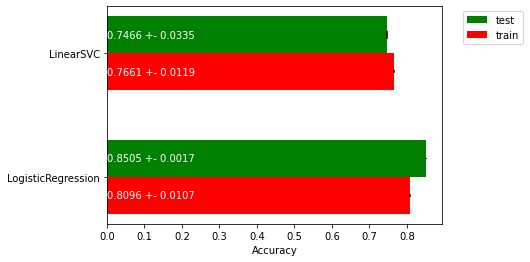

In [22]:
# Haz un grafico de barras que contenga los scores para los conjuntos de train y test
fig, ax = plt.subplots()
width=0.3
ax.barh(np.arange(len(train_scores)), np.mean(test_scores, axis=1), width,
        yerr= np.std(test_scores, axis=1), color='green', label='test')
ax.barh(np.arange(len(train_scores))-width, np.mean(train_scores, axis=1), width,
        yerr= np.std(train_scores, axis=1), color='red', label='train')
for i, te, tr in zip(np.arange(len(train_scores)),test_scores,train_scores):
    ax.text(0, i, "{:.4f} +- {:.4f}".format(np.mean(te),np.std(te)), color='white', va='center')
    ax.text(0, i-width, "{:.4f} +- {:.4f}".format(np.mean(tr),np.std(tr)), color='white', va='center')
ax.set(yticks=np.arange(len(train_scores))-width/2, yticklabels=[c.__class__.__name__ for c in classifiers])
ax.set_xlabel('Accuracy')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

### Ejercicio 1.2
Interpreta la gráfica. ¿Cuál es el mejor clasificador? ¿Alguno de los modelos está sobreajustado? Si es así, ¿qué podemos hacer para solucionar esto? ¿Hay mucha variación en los resultados?

#### Solución 
Podemos ver que el "mejor" clasificador fue el de regresión logística, ya que al aplicar el modelo en el conjunto de "test", tuvo mejores resultados. De esta manera también recordemos que un sobreajuste es aquel que tiene mejor rendimiento o resultados en el conjunto de entrenamiento que el de test; siendo así, hay un sobreajuste en SVC. Para poder solucionar este problema se suele hacer algún mapeo en los datos o reducción de los mismos, ya sea por PCA. También en este caso particular, es modificar el parámetro C de SVM, el cual se refiere a el parámetro de penalización del término de error. Controla la compensación entre un límite de decisión suave y la clasificación correcta de los puntos de entrenamiento.

## Ejercicio 2: Regularización
Ahora ajustaremos el hiperparámetro de regularización principal de estos algoritmos: el costo de clasificación errónea en SVM (C), el parámetro de regularización en la regresión logística (C). Esperamos que el valor óptimo para los parámetros de C se encuentre en $[10^{-12},10^{12}]$. C debe variar en una escala logarítmica (es decir, [0.01, 0.1, 1, 10, 100])

### Ejercicio 2.1
Varíe los parámetros de regularización en el rango indicado anteriormente y, para cada clasificador, cree un diagrama de líneas que represente tanto el puntaje de entrenamiento como el de prueba para cada valor del hiperparámetro de regularización. Por lo tanto, debe producir 2 gráficos, uno para cada clasificador. Utilice la validación cruzada de 5 veces predeterminada para todas las puntuaciones, pero solo represente las medias.

Hints:
* Piensa en la complejidad temporal de estos modelos. Probar demasiados valores de hiperparámetros puede llevar demasiado tiempo.
* Puedes hacer uso de las funciones de numpy [logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html), [geomspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.geomspace.html?highlight=geomspace#numpy.geomspace), y [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace).
* Puedes la función predeterminada de matplotlib [plot](https://matplotlib.org/tutorials/introductory/pyplot.html) para graficar el score de train y test.
* Puede recorrer manualmente los rangos de hiperparámetros, o ya puede consultar la función de scikit-learn [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) para ahorrar tiempo. 


In [63]:
from sklearn.model_selection import GridSearchCV

param_c = {'C': np.logspace(-13, 13, num=10)}
grids = [param_c, param_c]

grid_searches = [GridSearchCV(clf, grid, n_jobs=-1, cv=3, return_train_score=True).fit(Xs, ys) for clf,grid in zip(classifiers,grids)]

In [64]:
# Generic plot for 1D grid search
# grid_search:El resultado de utilizar GridSearchCV
# param_name: El nombre del parametro que esta siendo variado
def plot_tuning(grid_search, param_name, ax):
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker = '.', label = 'Test score')
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker = '.', label = 'Train score')
    ax.set_ylabel('score (ACC)')
    ax.set_xlabel(param_name)
    ax.legend()
    ax.set_xscale('log')
    ax.set_title(grid_search.best_estimator_.__class__.__name__)
    bp, bs = grid_search.best_params_[param_name], grid_search.best_score_
    ax.text(bp,bs,"  C:{:.2E}, ACC:{:.4f}".format(bp,bs))

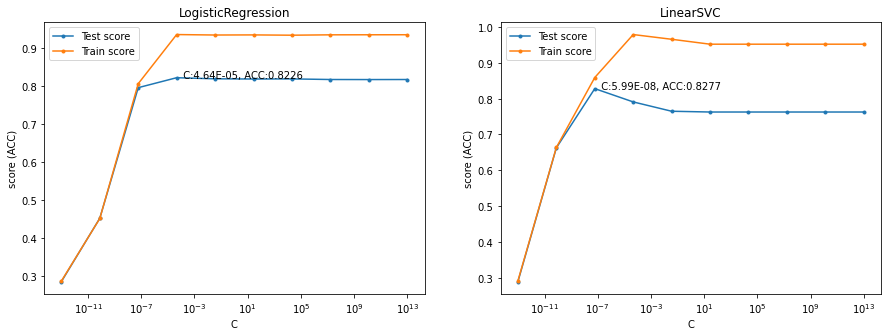

In [72]:
fig, axes = plt.subplots(nrows=len(param_c), ncols=len(grid_searches), figsize=(15,5))
for grid_search, param, ax in zip(grid_searches,['C','C'],axes):
    plot_tuning(grid_search, param, ax)

### Ejercicio 2.2
Interpretar las graficas. ¿Cuándo se tiene underfitting? ¿Cuándo se tiene overfitting? ¿Qué tan sensibles son al hiperparámetro de regularización?

#### Solución
Podemos ver que hay underfitting, es decir, bajo "performance" en los datos de entrenamiento y de test; por lo que de $C = 10^{-11}$ a $C = 10^{-7}$ hay underfitting, en el caso de Regresión Logística hay un score por debajo de 0.8 (de hecho se mantiene para $10^{-7}$ a $10^{13}$) y para SVC kernel lineal hay un rendimiento similar, aunque éste mismo decae un poco para los de test de $10^{-3}$ en adelante.

En el caso de overfitting, es para los valores de $10^{-7}$ en adelante para ambos modelos.

Se ve que los primeros valores para C no se tan perceptible los cambios de hiparámetros, en adelante ya se nota un compartamiento más "constante" en los score.

## Ejercicio 3: Interpretación de clasificaciones erróneas
Lo más probable es que sus modelos aún no sean perfectos. Es importante entender qué tipo de errores todavía comete. Echemos un vistazo más de cerca a qué instancias están mal clasificadas y qué clases a menudo se confunden.

Entrena el modelo de regresión logística con `C=1e-7`. Entrene el modelo en un conjunto de entrenamiento y haga predicciones para un conjunto de prueba (ambos conjuntos deben muestrearse de nuestra submuestra del 10 %).

In [75]:
# Construyendo conjuntos de entranmiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.1)

Para este caso, como se muestra al inicio, Xs y ys son datasets de entrenamiento a los que ya se les hizo split, de esta manera cambio los parámetros por los datasets completos

### Ejercicio 3.1
Entrene al clasificador como se describe arriba, obtenga las predicciones `y_pred` en el conjunto de prueba e identifique todas las muestras mal clasificadas `misclassified_samples`. Luego, ejecute el código de visualización a continuación para estudiar las clasificaciones erróneas

In [105]:
# Implemente el código para obtener las predicciones reales en el conjunto de prueba
model = LogisticRegression(C=1e-7).fit(X_train,y_train)
y_pred = list(model.predict(X_test)) # valores ficticios, reemplace y_test con las predicciones reales

In [113]:
y_pred = list(map(int, y_pred))
y_test_list = list(map(int, list(y_test)))
misclassified_samples = []


for i in range(len(y_pred)):
    if y_pred[i] != y_test_list[i]:
        misclassified_samples.append(i)

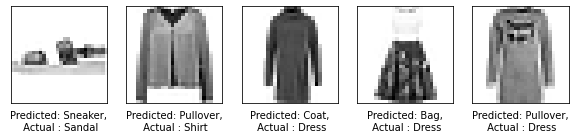

In [117]:
# Visualice las (primeras cinco) clasificaciones erróneas, junto con la clase prevista y real
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for nr, i in enumerate(misclassified_samples[:5]):
    axes[nr].imshow(X_test.values[i].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % (fmnist_classes[int(y_pred[i])],fmnist_classes[int(y_test.values[i])]))
    axes[nr].set_xticks(()), axes[nr].set_yticks(())

plt.show();

### Ejercicio 3.2

Interpretar los resultados. ¿Son de esperar estas clasificaciones erróneas?

Por lo menos a simple vista, puedo ver que al menos para mí también es difícil "clasificar" correctamente las imágenes, por lo menos en la segunda imágen yo diría que en efecto es un suéter. Por lo menos de manera subjetiva, es de esperarse estas clasificaciones.

### Ejercicio 3.3.
Ejecute el siguiente código en sus resultados para dibujar la matriz de confusión y obtener más información sobre las clasificaciones erróneas  de tu modelo.

Una matriz de confusión muestra la cantidad de ejemplares para cada par de clases verdaderas y predichas. Interpretar los resultados.
¿Su modelo produce ciertos tipos de error con más frecuencia que otros tipos?

In [119]:
y_pred = model.predict(X_test)

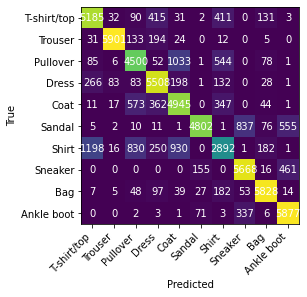

In [120]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(fmnist_classes.values()), rotation=45, ha="right")
ax.set_yticklabels(list(fmnist_classes.values()))
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

## Ejercicio 3.4 
Repita los ejercicios 3.1, 3.2, 3.3 pero construyendo un modelo lineal SVM con `C=1e-8`.

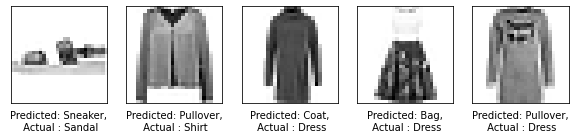

In [146]:
# 3.1 
# Implemente el código para obtener las predicciones reales en el conjunto de prueba
model = LinearSVC(C=1e-8).fit(X_train,y_train)
y_pred = list(model.predict(X_test)) # valores ficticios, reemplace y_test con las predicciones reales

y_pred = list(map(int, y_pred))
y_test_list = list(map(int, list(y_test)))
misclassified_samples = []


for i in range(len(y_pred)):
    if y_pred[i] != y_test_list[i]:
        misclassified_samples.append(i)
        
# Visualice las (primeras cinco) clasificaciones erróneas, junto con la clase prevista y real
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for nr, i in enumerate(misclassified_samples[:5]):
    axes[nr].imshow(X_test.values[i].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % (fmnist_classes[int(y_pred[i])],fmnist_classes[int(y_test.values[i])]))
    axes[nr].set_xticks(()), axes[nr].set_yticks(())

plt.show();

#### 3.2
Podemos ver que siguen habiendo los mismos primeros cinco errores en estas imágenes, por lo que el problema persiste, es muy difícil, dados los pixeles que el modelo ahora los clasifique bien. Aunque el primero es el que más se aleja de lo que debería ser, en este caso no podríamos decir aún que este modelo es mejor o no.

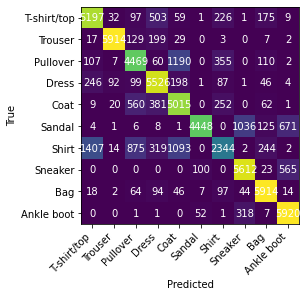

In [147]:
# 3.3
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(fmnist_classes.values()), rotation=45, ha="right")
ax.set_yticklabels(list(fmnist_classes.values()))
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

## Ejercicio 4: Interpretación de los parámetros del modelo
Finalmente, veremos más de cerca los parámetros del modelo, es decir, los coeficientes de nuestros modelos lineales. Como estamos tratando con imágenes de 28x28 píxeles, tenemos que aprender 784 coeficientes. ¿Qué significan estos coeficientes? Comenzaremos representándolos como imágenes de 28x28 píxeles.

### Ejercicio 4.1
Entrene un modelo de regresión logística y una SVM lineal utilizando sus hiperparámetros ajustados del ejercicio 2.
En caso de duda, utilice `C=1e-7` para LogReg y `C=1e-8` para SVM.
Pase el modelo entrenado a la función de trazado proporcionada. Interpretar los resultados en detalle.
¿Por qué obtiene múltiples graficas por modelo? ¿Qué representan las características en sus datos?
¿Parece que los modelos prestan atención a las características correctas?
¿Parece que sus modelos ignoran ciertas características? ¿Observa diferencias de calidad entre las diferentes clases? ¿Observáis alguna diferencia entre los modelos?

In [123]:
# Traza los coeficientes del modelo dado como mapas de calor de 28x28. 
# El atributo `name` es opcional, es simplemente un título para la figura producida
def plot_coefficients(model, name=None):
    fig, axes = plt.subplots(1,10,figsize=(20,2))
    fig.suptitle(name if name else model.__class__.__name__)
    for i, ax in enumerate(axes):
        m = ax.imshow(model.coef_[i].reshape(28,28))
        ax.set_xlabel(fmnist_classes[i])
        ax.set_xticks(()), ax.set_yticks(())
    fig.colorbar(m, ax=axes.ravel().tolist())

In [127]:
lr_4 = LogisticRegression(C=10e-7).fit(X_train, y_train)

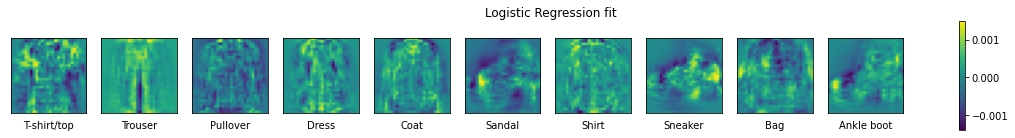

In [128]:
plot_coefficients(lr_4, 'Logistic Regression fit')

In [138]:
svm_4 = LinearSVC(C=10e-8).fit(X_train, y_train)

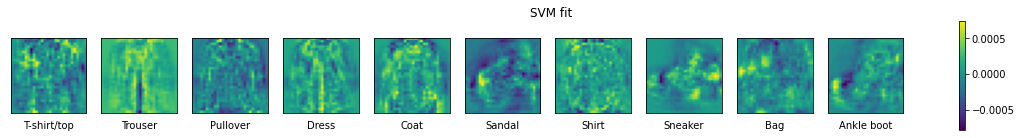

In [139]:
plot_coefficients(svm_4, 'SVM fit')

#### Interpretación
Aquí podemos ver que los resultados son similares, ya que como se ve en los plot del ejercicio 2, en los coeficientes C propuestos nos indican que tienen casi el mismo score, por lo que es de esperarse que en la representación de los pixeles se vean similares. Habrá que comparar las imágenes que están mal clasificadas con su verdadera clasificación, quizás los patrones se ven "casi iguales" y por ello mismo se suelen etiquetar mal nuestra clasificación.

### Ejercise 4.2
Repite el ejercicio anterior, pero ahora además de una versión tuneada, añade también un modelo con overfitting y otro que tenga underfitting. Interpreta y explica los resultados. (6 modelos en total)

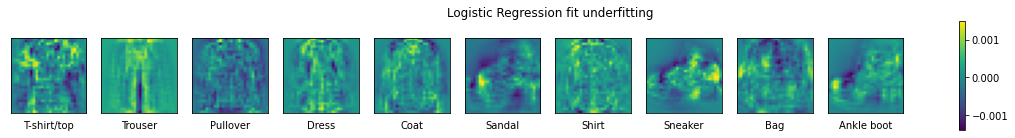

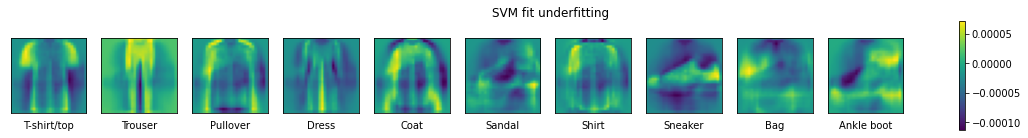

In [143]:
# Underfitting

lr_4_2 = LogisticRegression(C=10e-9).fit(X_train, y_train)
svm_4 = LinearSVC(C=10e-10).fit(X_train, y_train)

plot_coefficients(lr_4, 'Logistic Regression fit underfitting')
plot_coefficients(svm_4, 'SVM fit underfitting')

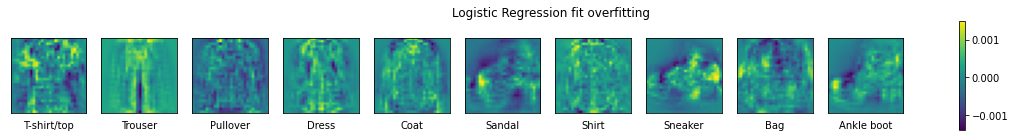

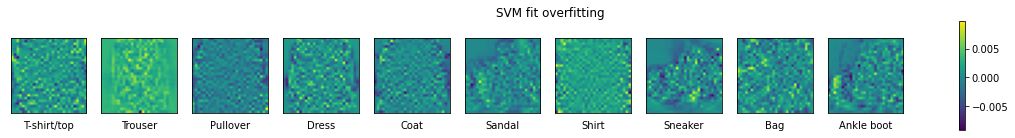

In [144]:
# Overfitting

lr_4_2 = LogisticRegression(C=10e9).fit(X_train, y_train)
svm_4 = LinearSVC(C=10e10).fit(X_train, y_train)

plot_coefficients(lr_4, 'Logistic Regression fit overfitting')
plot_coefficients(svm_4, 'SVM fit overfitting')

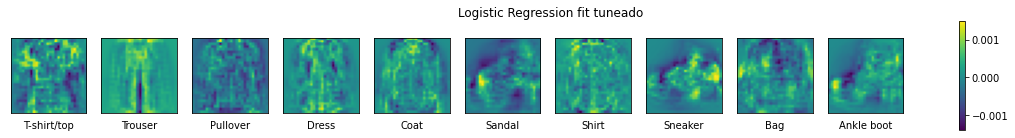

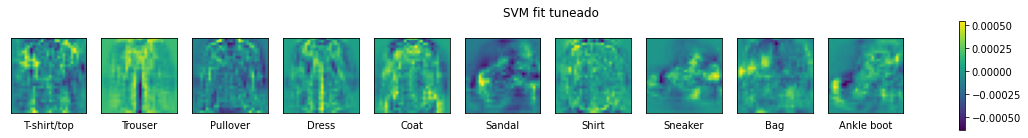

In [153]:
# Tuneado 

lr_4_2 = LogisticRegression(C=4.6e-5).fit(X_train, y_train)
svm_4 = LinearSVC(C=5.99e-8).fit(X_train, y_train)

plot_coefficients(lr_4, 'Logistic Regression fit tuneado')
plot_coefficients(svm_4, 'SVM fit tuneado')

#### Interpretaciones
Vemos que en el caso de Overfitting, el modelo de SVM no fue bueno, que de esta manera a primera instancia vemos que hay más posibilidad de se clasifiquen mal, porque no hay como que una estructura clara que nos haga hacer buen "match" con las imágenes que sí corresponden. En el caso de Underfitting hay muchas "manchas" que nos podrían provocar sesgo en nuestra clasificación, siendo así también un bajo rendimiento o predicción de resultados. Ahora para los datos tuneados, el análisis es muy similar al inciso anterior; es decir, se puede ver un comportamiento casi igual con estos parámetros, teniendo un score del 80% y un poco mejor para SVC.